# Demo: Standardizing Images in PyTorch

In [64]:
# In this demo,
# we'll see how we can perform image pre-processing
# operations using the PyTorch framework.

In [65]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

In [66]:
# If you're going to be feeding in images to your ML model,
# you won't work with a single image.
# Unless it's for prediction, you'll be working with a dataset of images,
# and the dataset that I'm going to download here is the CIFAR-10 [saifar] dataset.
# This dataset is freely available at the cs.toronto.edu URL that you see here on screen.
# It consists of images. All of the images are 32 pixels by 32 pixels.
# They have labels, and they're images of a dog, cat, bird, ship, airplane, and so on (10 different classes).
# This is a great dataset to use to build and train your classifier.

# !wget https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz -P datasets

# This is a tar and gzip file.
# I'm going to run the tar command to untar and unzip this file
# so that it's available on this VM here.
#!tar xf datasets/cifar-10-python.tar.gz -C datasets

In [67]:
# I've unzipped the contents of this file to the datasets
# folder that we had set up earlier.
# a new subfolder has been created
# there  called cifar-10-batches-py,
# and you can click through and you'll find the cifar-10
# images which have been split up into batches.

In [68]:
# Here is the Python code to read in the cifar-10 images from a single batch.
# This is a pickle file,
# so I'll use the pickle utility in Python to load in the contents of this file. rb means read + binary.
with open('datasets/cifar-10-batches-py/data_batch_1', 'rb') as input_file:
    # Pickle.load deserializes this file and saves the contents in the X variable.
    X = pickle.load(input_file, encoding='latin1')

In [69]:
# Now the X variable has this key called data,
# which contains the actual images,
# so I'm going to extract the images from the X variable.
# The X variable now holds the tensor containing our images.

X = X['data']

In [70]:
# Let's take a look at the shape of the image data that we've got.
# You can see that we have 10000 images.
# That is the first dimension.
# The second dimension is a 1D vector representation of the image, height multiplied by width multiplied by number of channels,
# That gives us 3072. 32 x 32 x 3 for color images.
X.shape # batch_size, height * width * num_channels

(10000, 3072)

In [71]:
# Let's reshape these images to represent them in a different format.
# Here we'll have the number of images in a batch first,
# that is -1, the number of channels in an image,
# and then height and width.

X = X.reshape((-1, 3, 32, 32))

# You have 10000 images, they are all 3-channel or color images,
# and each image is 32 pixels by 32 pixels.
X.shape

# Remember that different machine learning frameworks might
# expect images to be in different formats,
# so you should know how you can use the reshape command to
# get the images in the form that you want.

(10000, 3, 32, 32)

In [72]:
# If you want to change the representation of your image tensors,
# you want to move the dimensions around, you can use the transpose operation.
# Here we originally had batch_size, channels,
# height and width, and we've transposed it to be batch_size,
# height, width, and channels.
# Batch_size was at index 0. It continues to remain at that index.
# At index 1 we had number of channels in the image,
# and we moved that to the very end.

# from (batch_size, channels, height, width) into (batch_size, height, width, channels)
X = X.transpose(0, 2, 3, 1)

# The X tensor now contains number of images height, width, and then number of channels.
X.shape

(10000, 32, 32, 3)

In [73]:
# And here is how you can use the reshape operation on a
# tensor to go back to the original format where every image
# is in the form of a 1D vector.

X = X.reshape(-1, 3 * 32 * 32)

X.shape

(10000, 3072)

In [74]:
# Let's check the array for the image at index 6
print(X[6])

[164 206  84 ... 122 170  44]


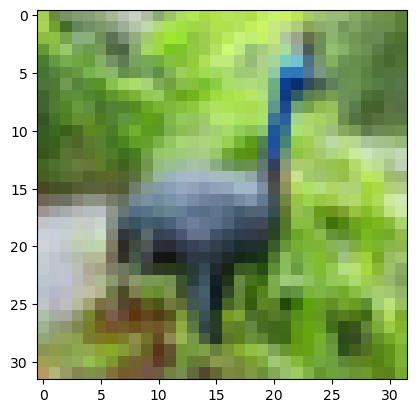

In [75]:
# Let's take a look at one of these images.
# I'm going to reshape the image at index position 6 so that it's height, width, number of channels, and display it using matplotlib.

plt.imshow(X[6].reshape(32, 32, 3))
plt.show()

# Here is an image of a bird.

In [76]:
type(X)

numpy.ndarray

In [77]:
# When you're working with neural networks,
# it's often useful to center your data, and this is true of images as well.
# You can subtract the mean value of all of the pixels 
X = X - X.mean(axis=0) # do it for all images, axis=0 means batch_dimension.
# and divide by the
# standard deviation so that your resulting images are all centered
# around 0 and expressed in terms z scores,
# or standard deviations.
X = X / np.std(X, axis=0) # do it for all images, axis=0 means batch_dimension. X is z-normalized now, every pixel is z-normalized separately.
# This will help the performance of the ML models that you build using these images.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


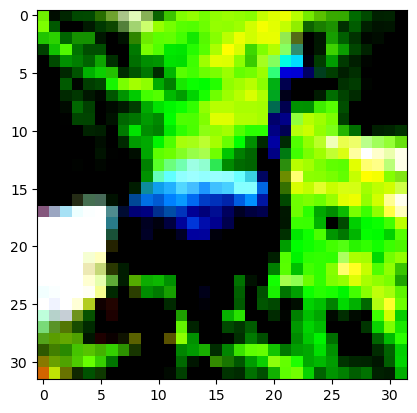

In [78]:
# Let's take a look at again on the image at index 6, after z_normalization.
# since as z_normalization we can have negative values, warning will be generated.
plt.imshow(X[6].reshape(32, 32, 3))
plt.show()

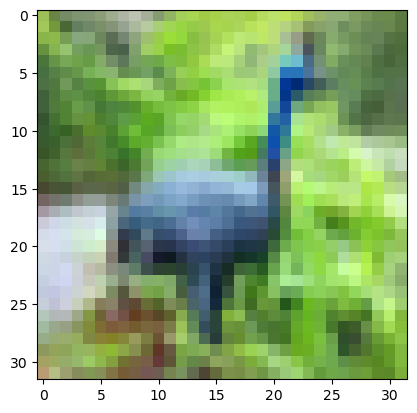

In [79]:
# I'm going to set up a little helper function called
# show here which takes in one image, reshapes it to be 32 x 32 x 3.
# I then find the minimum and maximum value of the pixel intensities,
# and scale all pixels to be within 0 and 1 using these min and max values.
def show(i):
    i = i.reshape((32, 32, 3))
    
    m, M = i.min(), i.max() # get min and mix for every pixel
    plt.imshow((i-m) / (M-m)) # standard min-max normalization which makes the values to be in the range of 0 and 1.
    plt.show()

    
# I'll now use this show function to display the image at index position 6.
# This is the same bird that we saw earlier,
# but remember, this image has been standardized.
show(X[6])

# Demo: ZCA Whitening to Decorrelate Features

In [80]:
# We've seen how to standardize batches of images, 
# the next operation I'm going to perform is called whitening, 
# which can be used to decorrelate features in our input images.
# Whitening is a computationally intense operation, 
# so I'm going to work with just a subset of images.
# I'll select the first thousand images, and we'll work with that. 
X_subset = X[:1000] # take the first 1000 images

X_subset.shape

(1000, 3072)

In [81]:
# The technique that we're about to perform is called ZCA whitening. 
# Whitening is the transformation of data in such a way that a 
# covariance matrix is the identity matrix, 
# and the effect of this mathematical transformation is to 
# decorrelate the features that exist in your images.
# If you feed in images with decorrelated features into your ML models,
# your classification models or other image-related models can be more robust.

In [82]:
# The first step in whitening is to calculate the covariance matrix of our images,
# which you can do by calling np.cov().
# The covariance between two variables can be thought of as a measure of
# the strength of the relationship between two variables.
# If greater values in one variable correspond to greater values in another,
# and vice-versa, those two variables are said to have positive covariance.
cov = np.cov(X_subset, rowvar=True)

In [83]:
# Here is the covariance matrix for our 1000 images.
# This is a 1000 x 1000 matrix,
# giving us the covariance values between every pair of images.

cov.shape

(1000, 1000)

In [84]:
# The next step is to extract the latent factors in our covariance matrix.
# We decompose the matrix using a factor analysis technique
# called singular value decomposition, or SVD.
# This is a computationally intensive step,
# and if you're not on a GPU, this might take several minutes to run.

U, S, V = np.linalg.svd(cov)

In [85]:
# You don't have to know the exact mathematics behind how singular value decomposition works.
print(U.shape)
print(S.shape)
print(V.shape)

(1000, 1000)
(1000,)
(1000, 1000)


In [86]:
epsilon = 1e-5

In [87]:
# The result of singular value decomposition gives us the latent factors in our images.
# This complicated dot product operation that you see on these
# latent factors is what allows us to calculate the principal
# components of the image features. Think of these as the significant features.
# There is a very small value epsilon that we use here in
# the denominator to avoid division by 0.
zca_matrix = np.dot(U, np.dot(np.diag(1.0 / np.sqrt(S + epsilon)), U.T))

In [88]:
zca_matrix.shape

(1000, 1000)

In [89]:
# The zca_matrix that is the result of the dot product contains
# the principal components of our image features.
# and we use a dot product once again and multiply the
# principal components by our original images,
# and this final step in this complex mathematical process is called whitening.
zca = np.dot(zca_matrix, X_subset)

In [90]:
# And the end result is our 1000 images,
# but this time every image will have decorrelated features.
zca.shape

(1000, 3072)

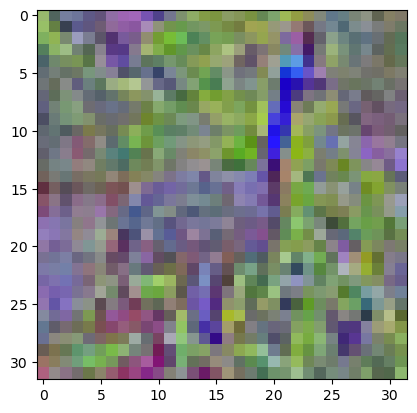

In [91]:
# Let's see image 6 once again,
# and this is what the resulting image looks like after whitening.
show(zca[6])

In [92]:
# Remember, you don't need to know the exact mathematics,
# you can follow these operations mechanically,
# but you should have a high-level understanding of what
# whitening does and how it's useful.

# Demo: Image Transformations Using PyTorch Libraries

In [119]:
import torch
import torchvision
import torchvision.transforms as transforms

In [94]:
# When you're working with images in PyTorch to feed into your ML model,
# you might want to perform a series of transformations on your images.

# The transforms module in PyTorch gives you a number of
# helper classes to help you perform these transformations as a part of image pre-processing.
dir(transforms)

# Here is a list of some of the image transformations
# operations that you can apply in PyTorch,
# CenterCrop, Normalize, Add,
# and you can randomly crop or randomly flip your images or resize your images.
# All of these image pre-processing techniques can be
# applied as a sequence to your input image.
# Let's see how.

['AutoAugment',
 'AutoAugmentPolicy',
 'CenterCrop',
 'ColorJitter',
 'Compose',
 'ConvertImageDtype',
 'FiveCrop',
 'GaussianBlur',
 'Grayscale',
 'InterpolationMode',
 'Lambda',
 'LinearTransformation',
 'Normalize',
 'PILToTensor',
 'Pad',
 'RandAugment',
 'RandomAdjustSharpness',
 'RandomAffine',
 'RandomApply',
 'RandomAutocontrast',
 'RandomChoice',
 'RandomCrop',
 'RandomEqualize',
 'RandomErasing',
 'RandomGrayscale',
 'RandomHorizontalFlip',
 'RandomInvert',
 'RandomOrder',
 'RandomPerspective',
 'RandomPosterize',
 'RandomResizedCrop',
 'RandomRotation',
 'RandomSizedCrop',
 'RandomSolarize',
 'RandomVerticalFlip',
 'Resize',
 'Scale',
 'TenCrop',
 'ToPILImage',
 'ToTensor',
 'TrivialAugmentWide',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'autoaugment',
 'functional',
 'functional_pil',
 'functional_tensor',
 'transforms']

In [95]:
# The transforms.Compose object allows you to specify a series
# of transformations in a list or a sequence.

# Here we are performing two transformations, we are resizing our original images to 256 x 256 images and
# then converting them to a PyTorch tensor.
transform = transforms.Compose([transforms.Resize(256),
                               transforms.ToTensor()
                               ])

In [96]:
# When you work with images in PyTorch, you'll load them into a dataset.
# Now it so happens that the CIFAR10 images are present
# as a built-in dataset in PyTorch.

# We instantiate the CIFAR10 dataset and point to a root folder,
# and we want to apply the series of transforms that we just specified to all
# of the images in the CIFAR10 dataset that we load in.
# Remember that the original images were 32 x 32.
# We're converting them to 256 x 256 images,
# and converting them to PyTorch tensors as well.
# This will download the dataset onto your local machine.
# dataset = torchvision.datasets.CIFAR10(root='./datasets/cifar10/train', download=True, transform=transform)

In [97]:
# and once the download is complete let's take a look at this dataset,
# and you can see its name and the transformations that you applied to this data.
# There are a total of 50000 images here.
dataset

Dataset CIFAR10
    Number of datapoints: 50000
    Root location: ./datasets/cifar10/train
    Split: Train
    StandardTransform
Transform: Compose(
               Resize(size=256, interpolation=bilinear, max_size=None, antialias=None)
               ToTensor()
           )

In [98]:
# Once you have a dataset in PyTorch,
# you can load in the data in this dataset in batches using a DataLoader.
# Here our batch_size is 16, and we're using 2 workers to load in data.
dataloader = torch.utils.data.DataLoader(dataset,
                                        batch_size=16,
                                        shuffle=True,
                                        num_workers=2)

In [99]:
# We can use the Python iter() function with our DataLoader to load in the
# first batch of images and the corresponding labels,
# which are also available.
images_batch, labels_batch = iter(dataloader).next() # gets the first batch

In [100]:
# You can see that one batch loads in 16 images,
# and all of these are multi-channel images, 256 x 256.
images_batch.shape

torch.Size([16, 3, 256, 256])

In [101]:
# And each image is associated with a label indicating what that image is,
# whether it's of an airplane, a bird, a horse.
labels_batch.shape

torch.Size([16])

In [102]:
# These labels are numeric values from 0 through 9.
# There are 10 categories in the CIFAR10 dataset of images.
labels_batch

tensor([7, 1, 9, 8, 9, 2, 2, 4, 7, 6, 2, 2, 3, 4, 3, 3])

In [103]:
# Let's take a look at all of the images in this batch by using
# a torchvision utility called make_grid().
img = torchvision.utils.make_grid(images_batch)

In [104]:
# Pass in your batch of images, and if you take a look at the shape of this grid,
# you can see that it just displays your images in two rows.
img.shape

torch.Size([3, 518, 2066])

In [105]:
# But the channel is at the very first dimension.
# I'm going to move that to the very last dimension,
# so that the images are in a format that matplotlib can display.

img = np.transpose(img, (1, 2, 0))

In [106]:
# Let's take a look at the resulting grid.
# There are two rows of images, and each row has a total of 8 images.
# [] [] [] [] [] [] [] []
# [] [] [] [] [] [] [] []
img.shape

torch.Size([518, 2066, 3])

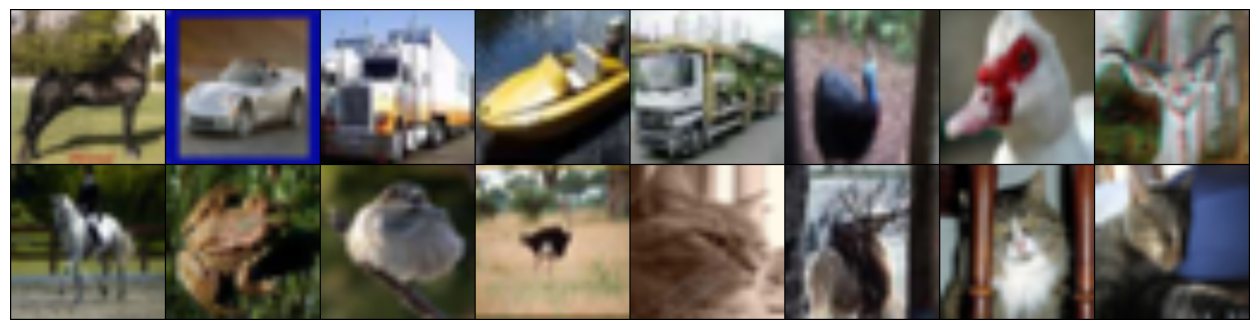

In [107]:
# I'll use matplotlib to display this grid,
# and here you can see some of the images in the CIFAR10 dataset.
plt.figure(figsize=(16, 12))
plt.imshow(img)
plt.axis("off")
plt.show()

# Demo: Normalizing Images Using Mean and Standard Deviation

In [111]:
# Now there are so many images in this dataset that you can't
# load all of them into memory at one go,
# but we still need to find the mean and standard deviation of these
# images so that we can standardize these images.
# We'll get the mean and standard deviation for the entire dataset by
# calculating this mean and standard deviation for each batch of
# images and storing it in this list here,
# pop_mean and pop_std.
pop_mean = []
pop_std = []

In [112]:
# I'll run a simple for loop through the DataLoader to access one batch
# of images and their corresponding labels at a time.
# Iterating over the DataLoader will give us the images,
# as well as the labels corresponding to the images.
for i, data in enumerate(dataloader, 0): # start=0
    # numpy_image contains all of the images in one batch with the batch_size first,
    # the number of channels, then height, then width.
    numpy_image = data[0].numpy() # data is tuple of images, labels; 0 will access images.
    
    # We'll calculate the mean and standard deviation separately for every channel,
    # and we'll do this across all of the images in one batch.
    # That's why the mean and standard deviation is run on the axis 0, 2, and 3.
    # 0 corresponds to batch, 2 corresponds to height, 3 corresponds to width.
    # This will give us a mean and standard deviation value for each channel.
    batch_mean = np.mean(numpy_image, axis=(0, 2, 3))
    batch_std = np.std(numpy_image, axis=(0, 2, 3))
    
    # Once we calculated mean and std for a batch of images, append it to the pop_mean and pop_std list.
    pop_mean.append(batch_mean)
    pop_std.append(batch_std)

In [113]:
# Convert these two lists to numpy arrays,
# so we get an array for pop_mean and pop_std deviation.
pop_mean = np.array(pop_mean)
pop_std = np.array(pop_std)

In [114]:
# and let's take a look at the shape of these arrays.
# You can see that they are 3125 x 3.
# There are 3125 batches,
# and a mean value and a standard deviation value for each of the three channels of an image.
pop_mean.shape, pop_std.shape

((3125, 3), (3125, 3))

In [115]:
# We can now approximate the mean and standard deviation for all of the images
# in our dataset by calculating the average values of each,
# the average of mean across each batch,
# and the average of standard deviations across each batch.
pop_mean = pop_mean.mean(axis=0)
pop_std = pop_std.mean(axis=0)

In [117]:
# This is a fairly decent approximation that we can work with.
# Now let's print out the mean and standard deviation values that we've just calculated.
# This is what we'll use to standardize the images in the CIFAR10 dataset.
print(pop_mean)
print(pop_std)

[0.49159148 0.4823458  0.44671938]
[0.23836686 0.23499078 0.2527545 ]


In [121]:
# If you're planning on feeding the CIFAR10 dataset
# to your machine learning model,
# here are some transforms that you can apply on the
# input images before you feed them in.
# Compose the transforms so that they're applied in a sequence.
# Observe that the initial transforms involve resizing the images so
# that all of the images are of the same size,
# and then performing some random operations on the images so that
# they're not exactly the same as the input data.
# A ColorJitter is what we've added, and a RandomHorizontalFlip.
# After these transformations have been applied,
# I've converted all of the image data to tensor format,
# and then normalized them using the mean and standard
# deviation that we just calculated.
# Observe that subtracting the mean and dividing by the standard deviation is
# available as a part of a built-in transformation in PyTorch, transforms.Normalize. 
# Just a note here that the term normalize refers to subtracting the mean
# and dividing the images by the standard deviation.
# Now very strictly speaking, this process is often referred to as standardization,
# but within PyTorch, normalization is basically subtracting the
# mean and dividing by the standard deviation,
# and this is something that you need to remember.
transform = transforms.Compose([transforms.Resize(256),
                               transforms.RandomResizedCrop(224),
                               transforms.ColorJitter(),
                               transforms.RandomHorizontalFlip(),
                               transforms.ToTensor(),
                               transforms.Normalize(pop_mean, pop_std)
                               ])

In [122]:
# With these transforms specified, let's load in the CIFAR10 dataset once again,
# and apply these transformations to the input image data.
# CIFAR10 is available as a built-in dataset in PyTorch.
# This will download the data if it isn't already present on your machine.
# The files have already been downloaded.
# They'll only be transformed based on your specifications.
trainset = torchvision.datasets.CIFAR10(root="./datasets/cifar10/train", train=True, download=True, 
                                        transform=transform)

Files already downloaded and verified


In [125]:
# I'll now create a new DataLoader using this training set that I've just downloaded, batch_size of 16,
# num_workers equal to 2.
# And I want this data to be shuffled when I load it into my ML model,
# which is why I've specified shuffle equal to True here.
trainloader = torch.utils.data.DataLoader(trainset, batch_size=16, shuffle=True, num_workers=2)

In [126]:
# Let's access one batch of our normalized data and take a look at what it looks like.
# Access this batch by calling iter() on the trainLoader and calling
# next to get the first batch of images and labels.
images_batch, labels_batch = iter(trainloader).next()

In [127]:
# You can see that there are 16 images in this batch.
# Each image is 224 x 224 pixels thanks to our resize and crop of the input images.
images_batch.shape

torch.Size([16, 3, 224, 224])

In [128]:
# Let's make a grid out of them.
# Here is what our grid looks like.
# The number of channels is the first dimension.

img = torchvision.utils.make_grid(images_batch)
img.shape

torch.Size([3, 454, 1810])

In [129]:
# I'm going to switch the dimensions around so that number of channels becomes the third dimension.
# This is what matplotlib understands.
img = np.transpose(img, (1, 2, 0))
img.shape

torch.Size([454, 1810, 3])

In [131]:
# With our grid set up,
# let's scale all of the pixel values so that they lie in the range 0-1.
# You'll find that certain versions of matplotlib throw an error if the
# pixel values are not between 0 and 1 or 0 and 255.
# So here are the min and max values of pixels.
# That is - 2.06 up to 2.2,
# and remember these are expressed in terms of standard
# deviations because we standardized our images.
m, M = img.min(), img.max()

m, M

(tensor(-2.0623), tensor(2.2029))

In [133]:
# Let's perform a little mathematical operation to scale
# the normalized image to the range 0-1.
# The pixel values of the images will not be centered around 0,
# they'll be centered around 0.5, which is why we have a + 0.5 at the end here.
img = (1/(abs(m) * M)) * img + 0.5

In [134]:
# If you take a look at the image matrix,
# we'll find that all of the pixel intensity numbers seem
# to be around 0.5 above and below it.
# This is what we wanted.
img

tensor([[[0.5000, 0.5000, 0.5000],
         [0.5000, 0.5000, 0.5000],
         [0.5000, 0.5000, 0.5000],
         ...,
         [0.5000, 0.5000, 0.5000],
         [0.5000, 0.5000, 0.5000],
         [0.5000, 0.5000, 0.5000]],

        [[0.5000, 0.5000, 0.5000],
         [0.5000, 0.5000, 0.5000],
         [0.5000, 0.5000, 0.5000],
         ...,
         [0.5000, 0.5000, 0.5000],
         [0.5000, 0.5000, 0.5000],
         [0.5000, 0.5000, 0.5000]],

        [[0.5000, 0.5000, 0.5000],
         [0.5000, 0.5000, 0.5000],
         [0.0895, 0.1694, 0.1827],
         ...,
         [0.7812, 0.7829, 0.7359],
         [0.5000, 0.5000, 0.5000],
         [0.5000, 0.5000, 0.5000]],

        ...,

        [[0.5000, 0.5000, 0.5000],
         [0.5000, 0.5000, 0.5000],
         [0.3430, 0.3384, 0.3637],
         ...,
         [0.3611, 0.3384, 0.4013],
         [0.5000, 0.5000, 0.5000],
         [0.5000, 0.5000, 0.5000]],

        [[0.5000, 0.5000, 0.5000],
         [0.5000, 0.5000, 0.5000],
         [0.

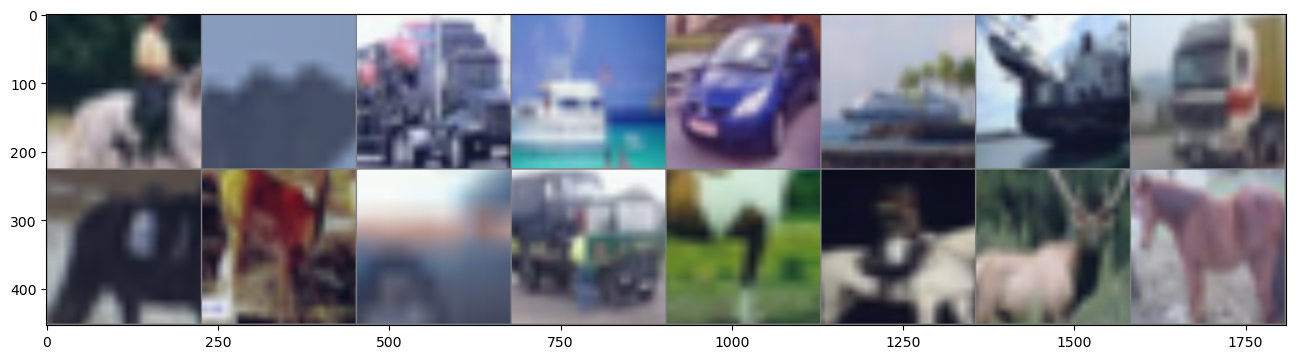

In [135]:
# We can now display this input grid using matplotlib,
# and here is what a few sample images from the CIFAR10 dataset look like
# after they've been normalized across the entire dataset.

plt.figure(figsize=(16, 12))
plt.imshow(img)
plt.show()